第5章　自己相関
=====
『Rによる計量経済学』第5章「自己相関」におけるPythonコードです。  
テキスト付属データセット(「k0501.csv」等)については出版社サイトよりダウンロードしてください。

例題5-1
-----
「k0501.csv」を用いた自己相関のないデータの回帰分析。  
ダービン=ワトソン統計量による自己相関の有無の仮説検定を行います。

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import pyper as pr
import matplotlib.pyplot as plt

データを読み込みます。

In [3]:
data = pd.read_csv('example/k0501.csv')

Rへデータを渡します。

In [4]:
r = pr.R(use_pandas=True)
r.assign('data1', data)

Rのコマンドを実行します。  
ここではsummary()を使って回帰分析の結果と、dwtest()を使ってダービン＝ワトソン統計量による自己相関の有無の仮説検定を表示します。  
なお、dwtest()はlmtestを予めRでインストールしてインポートしておかなければ上手く動かないようです。Rstudioを開き、Tools -> Install Packages で開かれた画面のPackagesの欄に「lmtest」と入力してInstallボタンをクリックすれば正常にインストールされます。

In [5]:
r(' library(lmtest)  ')
r('fm <- lm(Y ~ X, data=data1)')
print r('summary(fm)')
print r('dwtest(fm)')

try({summary(fm)})

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3212 -0.2682 -0.1515  0.5833  0.8485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53333    0.48011   1.111    0.299    
X            0.95758    0.07738  12.376 1.69e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7028 on 8 degrees of freedom
Multiple R-squared:  0.9504,	Adjusted R-squared:  0.9442 
F-statistic: 153.2 on 1 and 8 DF,  p-value: 1.695e-06


try({dwtest(fm)})

	Durbin-Watson test

data:  fm
DW = 2.0286, p-value = 0.3552
alternative hypothesis: true autocorrelation is greater than 0




最後にデータをPython側にとってきて、散布図と回帰直線を描きます。

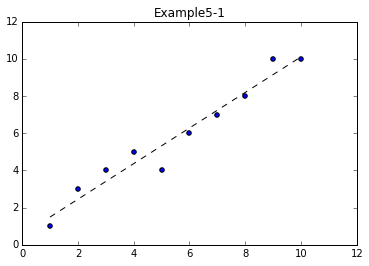

In [6]:
fm = r.get('fm$fitted.values')
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], fm, 'k--')
plt.title('Example5-1')

例題5-2
-----
「k0502.csv」を用いた自己相関のあるデータの回帰分析。  
ダービン=ワトソン統計量による自己相関の有無の仮説検定を行います。

データを読み込みます。

In [7]:
data = pd.read_csv('example/k0502.csv')

Rへデータを渡します。

In [8]:
r = pr.R(use_pandas =True)
r.assign('data1', data)

Rのコマンドを実行します。

In [9]:
r('library(lmtest)')
r('fm <- lm(Y ~ X, data=data1)')
print r('summary(fm)')
print r('dwtest(fm)')

try({summary(fm)})

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18032 -0.32871  0.01323  0.42371  0.80034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.27389    0.39844   3.197   0.0127 *  
X            0.75484    0.06468  11.671 2.65e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6064 on 8 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9376 
F-statistic: 136.2 on 1 and 8 DF,  p-value: 2.65e-06


try({dwtest(fm)})

	Durbin-Watson test

data:  fm
DW = 1.0941, p-value = 0.01798
alternative hypothesis: true autocorrelation is greater than 0




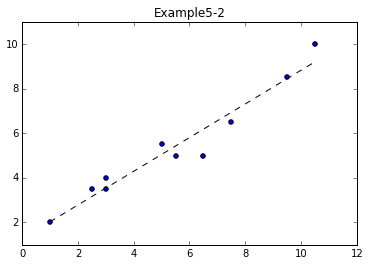

In [10]:
fm = r.get('fm$fitted.values')
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], fm, 'k--')
plt.title('Example5-2')

例題5-3
-----
「k0502.csv」を用いた自己相関のあるデータの回帰分析。  
ダービン=ワトソン統計量による自己相関の有無の仮説検定を行います。

本書では「k0502.csvのファイル」をExcelで予め計算して、
dX,dYを求めたものを「k0503.csv」として保存し、
「k0503.csv」を使ってRで回帰分析を行っていますが、
せっかくなのでExcelを使わずにデータ加工の部分もpandasを使ってPythonにやらせます。  
Rだとデータ加工がしづらいと言われますが（やったことないからわからないけど）、
Pythonだと簡単に出来るので特有のメリットと言えそうですね。

データ加工を行う。  
data内に階差の項目「dX」「dY」を作る。

In [11]:
data_dX = {}
data_dY = {}
for i in data.index:
    if i == 0:
        data_dX[i] = np.nan
        data_dY[i] = np.nan
    if i >= 1:
        data_dX[i] = data["X"][i] - data["X"][i-1]
        data_dY[i] = data["Y"][i] - data["Y"][i-1]
data["dX"] = pd.Series(data_dX)
data["dY"] = pd.Series(data_dY)

Rへデータを渡してコマンドの実行。

In [12]:
r = pr.R(use_pandas =True)
r.assign('data1', data)
r('library(lmtest)')
r('fm <- lm(dY ~ dX, data=data1)')
print r('summary(fm)')
print r('dwtest(fm)')

try({summary(fm)})

Call:
lm(formula = dY ~ dX, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8582 -0.3582  0.1866  0.6194  0.6642 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.1194     0.4189  -0.285   0.7839  
dX            0.9552     0.3389   2.819   0.0258 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6538 on 7 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5316,	Adjusted R-squared:  0.4647 
F-statistic: 7.945 on 1 and 7 DF,  p-value: 0.02582


try({dwtest(fm)})

	Durbin-Watson test

data:  fm
DW = 1.6936, p-value = 0.3773
alternative hypothesis: true autocorrelation is greater than 0




最後にデータをPython側にとってきて、散布図と回帰直線を描きます。  
「dX」「dY」の１つ目のデータはNaNになっているので2つ目のデータからプロットを行う。(ここがちょっとスマートじゃない気がする。。)

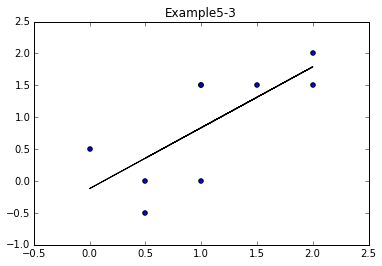

In [13]:
fm = r.get('fm$fitted.values')
plt.scatter(data["dX"], data["dY"])
plt.plot(data["dX"][1:], fm, 'k')
plt.title('Example5-3')